In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
df = pd.read_csv('student_scores.csv')
df.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [16]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

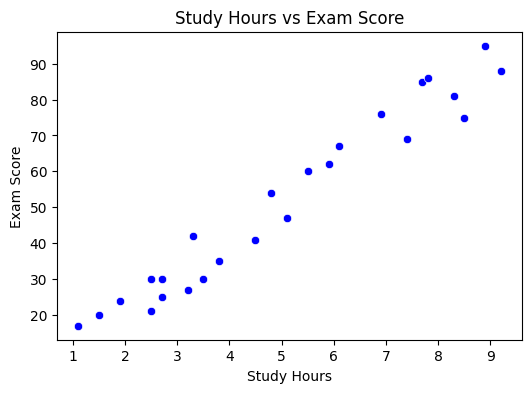

In [18]:

plt.figure(figsize=(6,4))
sns.scatterplot(x='Hours', y='Scores', data=df, color='blue')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

In [19]:
x = df[['Hours']]
y = df['Scores']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(x_test)

In [26]:
r2_score(y_test, y_pred)

0.9678055545167994

In [27]:
mean_absolute_error(y_test, y_pred)

3.9207511902099244

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.352380006653288

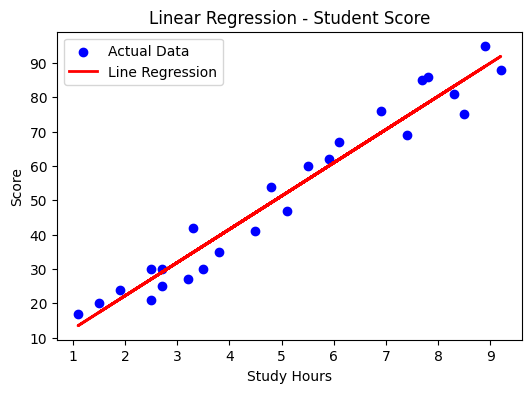

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, lr.predict(x), color='red', linewidth=2, label='Line Regression')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.title('Linear Regression - Student Score')
plt.legend()
plt.show()

In [32]:
pol = PolynomialFeatures(degree=2)
x_pol = pol.fit_transform(x)

In [33]:
pol_reg = LinearRegression()
pol_reg.fit(x_pol, y)

LinearRegression()

In [34]:
y_pol_pred = pol_reg.predict(pol.fit_transform(x_test))

In [35]:
r2_score(y_test,y_pol_pred)
mean_absolute_error(y_test,y_pol_pred)
np.sqrt(mean_squared_error(y_test,y_pol_pred))

4.338286013128563

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


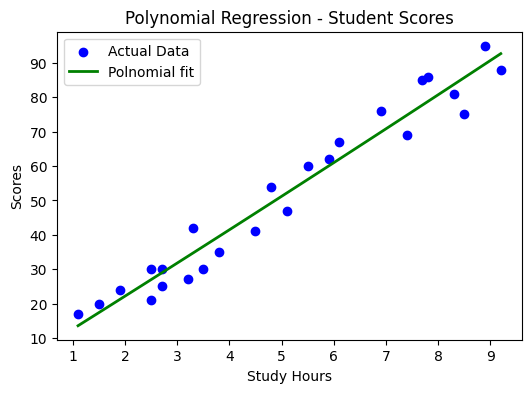

In [36]:
plt.figure(figsize=(6,4))
plt.scatter(x,y, color='blue', label='Actual Data')
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
plt.plot(x_range, pol_reg.predict(pol.transform(x_range)), color='green', linewidth=2, label='Polnomial fit')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.title('Polynomial Regression - Student Scores')
plt.legend()
plt.show()